In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Reading in CSV's and Naming Features

In [59]:
imdb_files = imdb_name_basics = pd.read_csv('imdb.name.basics.csv')
imdb_title_basics = pd.read_csv('imdb.title.basics.csv')
imdb_title_crew = pd.read_csv('imdb.title.crew.csv')
imdb_title_principals = pd.read_csv('imdb.title.principals.csv')
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv')



In [60]:
imdb_files_list = [imdb_name_basics, imdb_title_basics, imdb_title_crew, imdb_title_principals, imdb_title_ratings]

# Merging IMDB Tables

In [125]:
# Merge IMDB tables on tconst (renamed to 'title_id')
imdb_title_ratings_principals = pd.merge(imdb_title_ratings, imdb_title_principals, on = 'tconst', how = 'outer')
imdb_title_full = pd.merge(imdb_title_ratings_principals, imdb_title_crew, on = 'tconst', how = 'outer')
imdb_title_names_full = pd.merge(imdb_title_full, imdb_name_basics, on = 'nconst', how = 'outer')
imdb_title_names_full.head()



,tconst,averagerating,numvotes,ordering,nconst,category,job,characters,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt10356526,8.3,31.0,10.0,nm8994524,production_designer,NaN,NaN,nm8353804,"nm3057599,nm4179342",Kazi Rafik Ali,NaN,NaN,"production_designer,art_department","tt9190740,tt2837596,tt4773212,tt8749962"
1,tt9190740,8.3,39.0,9.0,nm8994524,production_designer,NaN,NaN,nm4179342,nm4179342,Kazi Rafik Ali,NaN,NaN,"production_designer,art_department","tt9190740,tt2837596,tt4773212,tt8749962"
2,tt8908024,NaN,NaN,4.0,nm8994524,production_designer,NaN,NaN,nm8423987,NaN,Kazi Rafik Ali,NaN,NaN,"production_designer,art_department","tt9190740,tt2837596,tt4773212,tt8749962"
3,tt10356526,8.3,31.0,1.0,nm4718369,actor,NaN,"[""Sukh""]",nm8353804,"nm3057599,nm4179342",Harish Verma,NaN,NaN,actor,"tt3265542,tt7246718,tt8108168,tt3331954"
4,tt7140020,6.4,24.0,1.0,nm4718369,actor,NaN,"[""MLA""]",nm5514467,"nm8337234,nm7337612,nm8337235,nm5514467",Harish Verma,NaN,NaN,actor,"tt3265542,tt7246718,tt8108168,tt3331954"


# Drop Columns not related to average rating

In [62]:
#drop unecessary columns
imdb_title_names_full = imdb_title_names_full.drop([
        'job', 
        'birth_year',
        'death_year',
        'ordering',
        'nconst',
        'numvotes',
        'directors',
        'writers',
        'characters',
        'known_for_titles',
        'tconst'],
        axis = 1)
    
    

In [63]:
# Drop NaN Average Rating
imdb_clean = imdb_title_names_full.dropna()


# Return names with 20 or more movies

In [94]:
# Data Assumption: Only counting people with > 20 movies 
imdb_names_count = imdb_clean.primary_name.value_counts()
imdb_prominent_names = imdb_names_count.loc[imdb_names_count > 10]
imdb_prominent_names.index

Index(['Kevin MacLeod', 'Eric Roberts', 'William Shakespeare', 'Gopi Sundar',
       'Vicente G. del Rosario III', 'S. Thaman', 'Brahmanandam',
       'Prakash Raj', 'Veronique del Rosario-Corpus', 'Jason Blum',
       ...
       'Ruwan Costa', 'Daniel Padilla', 'Bryan Senti', 'Thomas Dekker',
       'Bárbara Lennie', 'William Wai-Ting Chan', 'Mads Heldtberg',
       'Ingo Fliess', 'Andrew A. Kosove', 'Stephen McHattie'],
      dtype='object', length=4034)

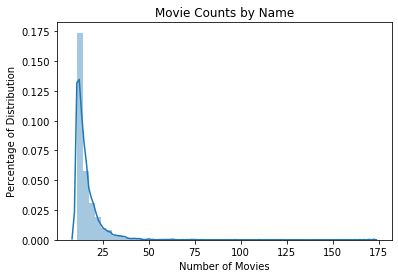

In [123]:
fig = plt.figure()
imdb_graph = sns.distplot(imdb_prominent_names)
plt.title('Movie Counts by Name')
plt.ylabel('Percentage of Distribution')
plt.xlabel('Number of Movies')
plt.show()
fig.savefig('imdb_movie_count2.png')

# Group DF by name and rating


In [96]:
average_ratings_by_name = imdb_clean.groupby('primary_name').mean()
average_ratings_by_name.sort_values('averagerating', ascending = False)


,averagerating
primary_name,
Cara Artman,10.0
Lance Vogel,10.0
Batman,10.0
Aurora Sharon Lewis,10.0
Ivana Diniz,10.0
...,...
Ramo Nakajima,1.0
Shûko Nemoto,1.0
Alveda King,1.0


In [97]:
name, count = np.unique(imdb_clean.primary_name, return_counts=True)

In [98]:
more_than_9 = []
for name, count in zip(name, count):
    if count > 9:
        more_than_9.append(name)

In [143]:
top_name_ratings = imdb_clean[imdb_clean.primary_name.isin(more_than_9)].sort_values('averagerating', ascending = False).iloc[0:10]
top_name_ratings.drop('primary_profession', axis = 1, inplace = True)
top_name_ratings.style.set_properties(**{'text_align': 'center'})
top_name_ratings.rename(columns = {'averagerating':'Average Rating', 'category': 'Category', 'primary_name':'Primary Name'}, inplace = True)
top_name_ratings

,Average Rating,Category,Primary Name
49669,10.0,composer,Grégoire Hetzel
35361,10.0,editor,Nadia Ben Rachid
149867,9.9,self,Sergey A.
131236,9.8,self,Maria Olsen
46613,9.7,actor,Eric Roberts
9002,9.7,actor,Leonardo DiCaprio
161585,9.7,actor,Kevin Sizemore
74091,9.7,actress,Margot Robbie
33044,9.7,producer,David Heyman
687,9.7,actor,Brad Pitt


In [145]:
#Check for duplicates
top_name_ratings[top_name_ratings.duplicated(keep = False)].sort_values('Primary Name')

,Average Rating,Category,Primary Name


In [147]:
top_category_ratings = top_name_ratings.groupby(['Category']).max()
top_category_ratings.style.set_properties(**{'text_align':'center'})

,Average Rating,Primary Name
Category,,
actor,9.7,Leonardo DiCaprio
actress,9.7,Margot Robbie
composer,10,Grégoire Hetzel
editor,10,Nadia Ben Rachid
producer,9.7,David Heyman
self,9.9,Sergey A.
